In [2]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import pandas as pd
import scipy.stats 
#import xlrd
import seaborn as sns
import matplotlib as mpl
mpl.rc('font',family='Arial')
##combine winners/losers into one plot 

In [8]:
c57_df=pd.read_excel(r'./data/rc_diff.xlsx',sheet_name="C57")
cd1_df=pd.read_excel(r'./data/rc_diff.xlsx',sheet_name="CD1")

c57_df

,rc_winner_count,rc_loser_count,% win,% lose
0,16,13,55.172414,44.827586
1,19,16,54.285714,45.714286
2,23,15,60.526316,39.473684
3,24,13,64.864865,35.135135
4,23,16,58.974359,41.025641
5,20,19,51.282051,48.717949
6,24,13,64.864865,35.135135
7,16,13,55.172414,44.827586
8,28,7,80.000000,20.000000
9,25,12,67.567568,32.432432


In [6]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return [m, m-h, m+h]

In [7]:
c57_win = mean_confidence_interval(c57_df["% win"])
c57_lose =  mean_confidence_interval(c57_df["% lose"])

cd1_win =  mean_confidence_interval(cd1_df["% win"])
cd1_lose = mean_confidence_interval(cd1_df["% lose"])

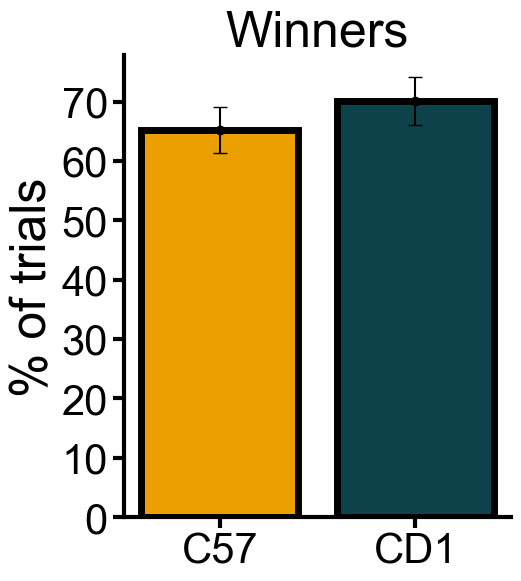

In [32]:
fig, ax = plt.subplots(figsize=(5,6))
labels = ['C57','CD1']
bplot1 = plt.bar(labels,[c57_win[0],cd1_win[0]], edgecolor = 'black', linewidth = 5)
plt.errorbar(labels,[c57_win[0],cd1_win[0]], yerr=[c57_win[0]-c57_win[1], cd1_win[0]-cd1_win[1]], fmt = 'o',color = 'black', capsize = 5 )

plt.title("Winners", family="Arial", fontsize=36)
#plt.xlabel("Strain", family="Arial", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel("% of trials", family="Arial", fontsize=36)
#plt.legend( prop={'size': 14, 'family': "Arial"})
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

# fill with colors
colors = ['#EC9F00', '#0E424B']

bplot1[0].set_color(colors[0])
bplot1[1].set_color(colors[1])

bplot1[0].set_edgecolor('black')
bplot1[1].set_edgecolor('black')

#for patch, color in zip(bplot1['boxes'], colors):
 #   patch.set_facecolor(color)

plt.show()

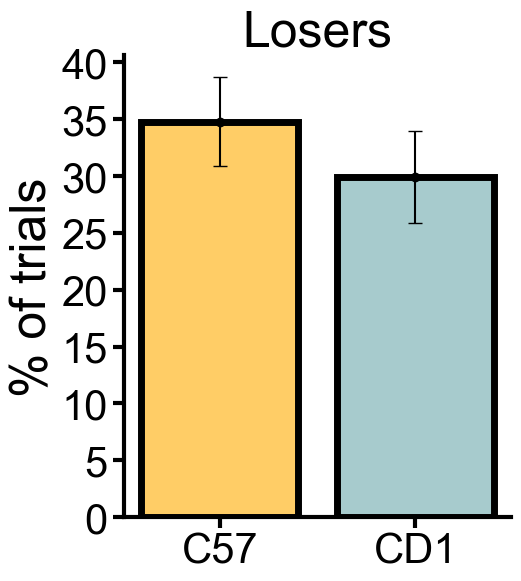

In [33]:
fig, ax = plt.subplots(figsize=(5,6))
labels = ['C57','CD1']
bplot2 = plt.bar(labels,[c57_lose[0],cd1_lose[0]], edgecolor = 'black', linewidth = 5)
plt.errorbar(labels,[c57_lose[0],cd1_lose[0]], yerr=[c57_lose[0]-c57_lose[1], cd1_lose[0]-cd1_lose[1]], fmt = 'o',color = 'black', capsize = 5 )

plt.title("Losers", family="Arial", fontsize=36)
#plt.xlabel("Strain", family="Arial", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylabel("% of trials", family="Arial", fontsize=36)
#plt.legend( prop={'size': 14, 'family': "Arial"})
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

# fill with colors
colors = ['#FFCD66', '#A7CBCD']

bplot2[0].set_color(colors[0])
bplot2[1].set_color(colors[1])

bplot2[0].set_edgecolor('black')
bplot2[1].set_edgecolor('black')

#for patch, color in zip(bplot1['boxes'], colors):
 #   patch.set_facecolor(color)


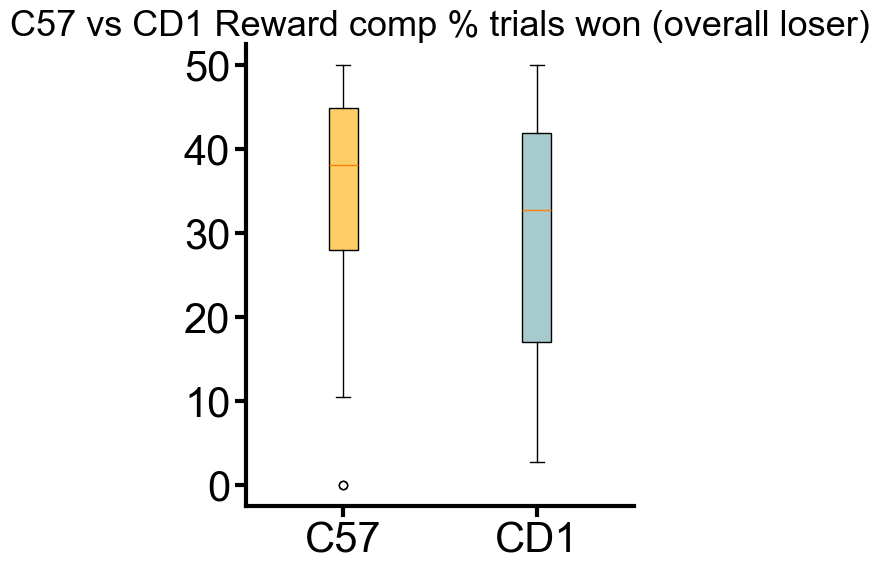

In [34]:
fig, ax = plt.subplots(figsize=(5,6))
labels = ['C57','CD1']
bplot1 = plt.boxplot([c57_df["% lose"],cd1_df["% lose"]],patch_artist=True, labels=labels)

plt.title("C57 vs CD1 Reward comp % trials won (overall loser)", family="Arial", fontsize=26)
#plt.xlabel("Strain", family="Arial", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#plt.ylabel("Percent of trials", family="Arial", fontsize=24)
#plt.legend( prop={'size': 14, 'family': "Arial"})
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

# fill with colors
colors = ['#FFCD66', '#A7CBCD']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

plt.show()

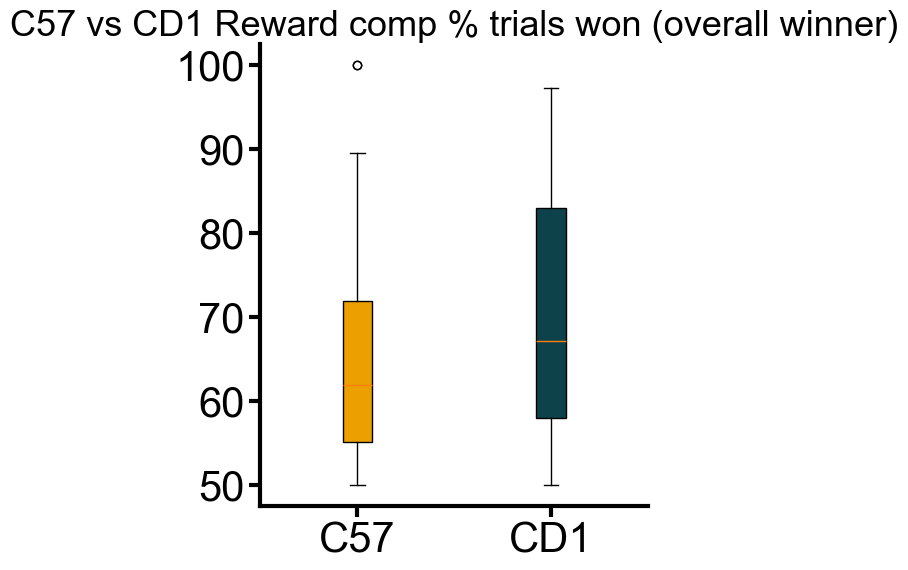

In [35]:
fig, ax = plt.subplots(figsize=(5,6))
labels = ['C57','CD1']
bplot1 = plt.boxplot([c57_df["% win"],cd1_df["% win"]],patch_artist=True, labels=labels)

plt.title("C57 vs CD1 Reward comp % trials won (overall winner)", family="Arial", fontsize=26)
#plt.xlabel("Strain", family="Arial", fontsize=24)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
#plt.ylabel("Percent of trials", family="Arial", fontsize=24)
#plt.legend( prop={'size': 14, 'family': "Arial"})
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)


for axis in ['left', 'bottom']:
    ax.spines[axis].set_linewidth(3)
ax.tick_params('both', length =8, width = 3)

# fill with colors
colors = ['#EC9F00', '#0E424B']

for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

plt.show()